<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_ex_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejrcicio 1 de K-Means, 16 del curso.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datos de ejemplo
Make blobs genera datos de muestra aleatorios sobre los que luego probaremos el algoritmo k_means

+ n_samples   : Número de muestras
+ n_features  : Variables de cada muestras
+ centers     : entorno a cuantos centros se agrupan los datos
+ cluster_std : Grado de concentración de las muestras entorno a los centros

In [81]:
from sklearn.datasets import make_blobs
# una muestra pequeña para ver el contenido de la estructura generada
datos_20 = make_blobs(n_samples=20, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [82]:
datos_20


(array([[ -1.19856602,   2.50408937],
        [ -3.30473029,   2.74557144],
        [  2.81075239,   5.32061179],
        [  4.85535626,   7.27130059],
        [  1.27983684,   0.35315078],
        [ -5.90663588,   7.87292126],
        [ -9.67322877,  -5.86661676],
        [ -1.35185444,   3.13245345],
        [  4.00596798,   7.0100406 ],
        [  5.15941028,   6.80926467],
        [ -3.43204708,  11.46623571],
        [ -8.88571766,  -3.52086561],
        [ -2.01390413,   7.59038537],
        [ -4.73977437,  -5.33925088],
        [  0.66762411,   0.04738204],
        [-12.50147015,  -8.65598182],
        [ -5.64854991,   8.2265007 ],
        [ -9.08708569,  -3.00780369],
        [  2.00740811,   7.55049022],
        [ -4.07086758,  11.29542023]]),
 array([0, 0, 2, 2, 0, 3, 1, 0, 2, 2, 3, 1, 3, 1, 0, 1, 3, 1, 2, 3]))

Vemos que los datos generados tienen dos componentes:

+ datos_20[0]:La matriz de características X de la muestra.
+ datos_20[1]:EL vector de grupo al que pertenece cada dato de la muestra.

In [83]:
print("Primera característica",datos_20[0][:,0])

Primera característica [ -1.19856602  -3.30473029   2.81075239   4.85535626   1.27983684
  -5.90663588  -9.67322877  -1.35185444   4.00596798   5.15941028
  -3.43204708  -8.88571766  -2.01390413  -4.73977437   0.66762411
 -12.50147015  -5.64854991  -9.08708569   2.00740811  -4.07086758]


In [84]:
print("Segunda característica",datos_20[0][:,1])

Segunda característica [ 2.50408937  2.74557144  5.32061179  7.27130059  0.35315078  7.87292126
 -5.86661676  3.13245345  7.0100406   6.80926467 11.46623571 -3.52086561
  7.59038537 -5.33925088  0.04738204 -8.65598182  8.2265007  -3.00780369
  7.55049022 11.29542023]


In [85]:
datos_18 = make_blobs(n_samples=300, n_features=2, centers=6, cluster_std=1.8, random_state=101)
datos_10 = make_blobs(n_samples=300, n_features=2, centers=6, cluster_std=1.0, random_state=101)
datos_05 = make_blobs(n_samples=300, n_features=2, centers=6, cluster_std=0.5, random_state=101)

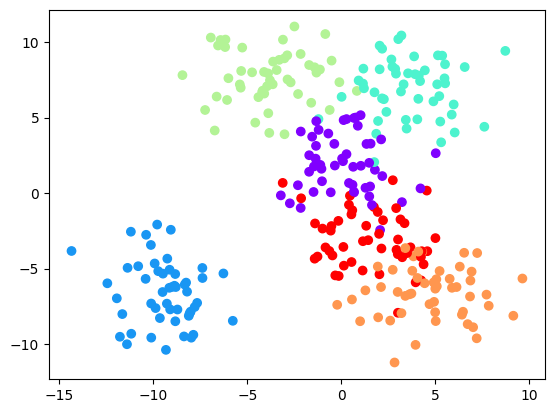

In [86]:
plt.scatter(datos_18[0][:,0], datos_18[0][:,1], c=datos_18[1], cmap='rainbow')


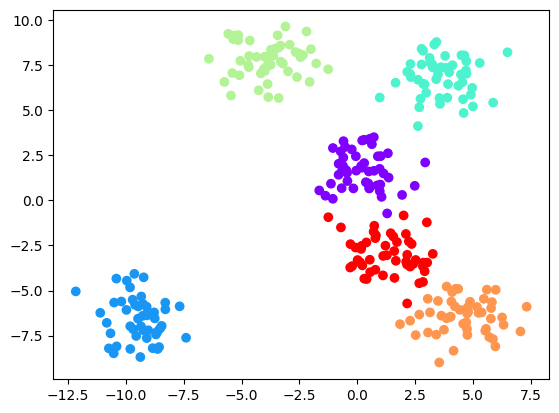

In [87]:
plt.scatter(datos_10[0][:,0], datos_10[0][:,1], c=datos_10[1], cmap='rainbow')


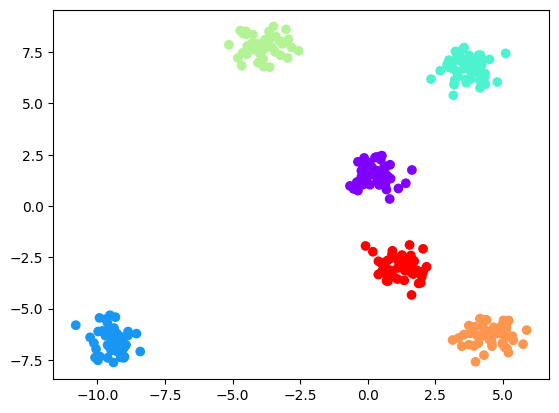

In [88]:
plt.scatter(datos_05[0][:,0], datos_05[0][:,1], c=datos_05[1], cmap='rainbow')

In [89]:
datos_3d = make_blobs(n_samples=300, n_features=3, centers=6, cluster_std=0.5, random_state=101)

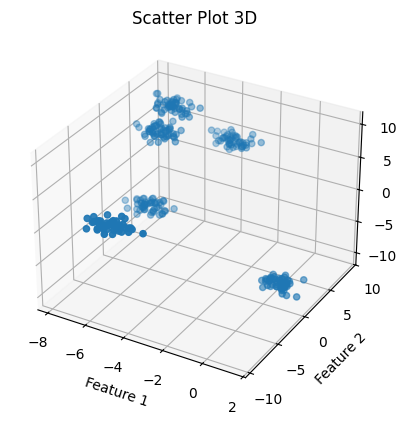

In [90]:
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear el scatter plot 3D
ax.scatter(datos_3d[0][:, 0], datos_3d[0][:, 1], datos_3d[0][:, 2])

# Etiquetas de los ejes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Título del gráfico (opcional)
plt.title('Scatter Plot 3D')

# Mostrar el gráfico
plt.show()

## Algoritmo K_means

AL instanciar la clase, lo hacemos con un número de grupos enconcreto.

La razón principal para especificar el número de clústeres es que el algoritmo K-Means es un algoritmo de **agrupamiento particional**. Esto significa que divide el conjunto de datos en un número predefinido de clústeres. No intenta descubrir automáticamente el número óptimo de clústeres.

El número de clústeres que elijas tendrá un impacto significativo en el resultado del agrupamiento. Si eliges un número incorrecto, los clústeres resultantes podrían no reflejar la estructura real de los datos.

Existen métodos para ayudarte a determinar un número adecuado de clústeres, como el** método del codo** o el coeficiente de silueta, pero inherentemente, K-Means requiere que le proporciones este valor al inicio.

In [91]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=4)

### Entrenamiento
Este algorimo es un aprendizaje no supervisado. No hay etiquetas. Se le pasa la matriz de características completa

In [92]:
modelo.fit(datos_10[0])

KMeans(n_clusters=4)

#### Cuales son los centros de los clusters?

In [93]:
modelo.cluster_centers_

array([[ 1.94733662,  4.30952826],
       [-9.41787067, -6.56349768],
       [ 2.9445256 , -4.67924408],
       [-3.84612799,  7.75588963]])

#### ¿En que grupo de ha agrupado cada elemento de la muestra?

In [94]:
modelo.labels_

array([1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 1, 0, 2, 1, 2, 1, 0, 0, 3, 2, 2, 1, 2, 0, 0, 2, 3, 0, 1, 2, 1,
       0, 1, 2, 3, 2, 0, 2, 2, 2, 3, 3, 0, 3, 0, 1, 3, 0, 1, 2, 1, 2, 0,
       1, 2, 3, 0, 2, 1, 3, 1, 2, 2, 3, 3, 3, 3, 2, 0, 3, 2, 3, 0, 3, 0,
       1, 1, 0, 0, 2, 2, 3, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2,
       0, 3, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 3, 0, 3, 3, 1, 1, 1, 0, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2,
       3, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 3, 1, 2,
       0, 0, 3, 0, 0, 2, 0, 3, 2, 3, 0, 1, 0, 2, 0, 3, 0, 0, 1, 3, 2, 0,
       2, 2, 0, 3, 0, 3, 2, 3, 0, 3, 3, 0, 2, 2, 2, 2, 1, 0, 2, 1, 3, 1,
       0, 2, 1, 1, 0, 2, 0, 0, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2, 0, 0, 0, 0,
       0, 3, 2, 1, 1, 3, 2, 0, 0, 2, 0, 2, 1, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 3,
       0, 0, 2, 0, 3, 2, 2, 0, 0, 1, 1, 2, 0, 2], d

 #### ¿que inercia tiene esta agrupación?

 Se basa en el cálculo de la suma de los cuadrados de las distancias de cada punto a su centro de clúster asignado (dentro de cada clúster), conocida como "Within-Cluster Sum of Squares" (WCSS) o "inertia".

 $$
WCSS = \sum_{i=1}^{n} ||x_i - c_{j_i}||^2
$$

Donde:

*   $n$ es el número total de puntos de datos.
*   $x_i$ es el i-ésimo punto de datos.
*   $c_{j_i}$ es el centroide del clúster al que se ha asignado el punto de datos $x_i$.
*   $||x_i - c_{j_i}||^2$ es la distancia euclidiana al cuadrado entre el punto de datos $x_i$ y el centroide $c_{j_i}$.

In [95]:
modelo.inertia_

2162.8575621380405

### Representación gráfica de la agrupación

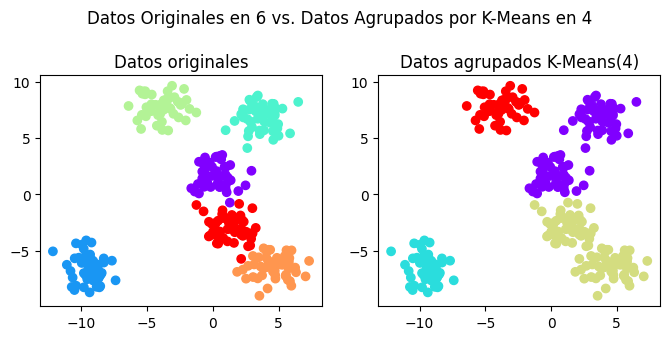

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.scatter(datos_10[0][:,0], datos_10[0][:,1], c=datos_10[1], cmap='rainbow')
ax1.set_title("Datos originales")
ax2.scatter(datos_10[0][:,0], datos_10[0][:,1], c=modelo.labels_, cmap='rainbow')
ax2.set_title("Datos agrupados K-Means(4)")
fig.suptitle('Datos Originales en 6 vs. Datos Agrupados por K-Means en 4', y=1.1)
plt.show()

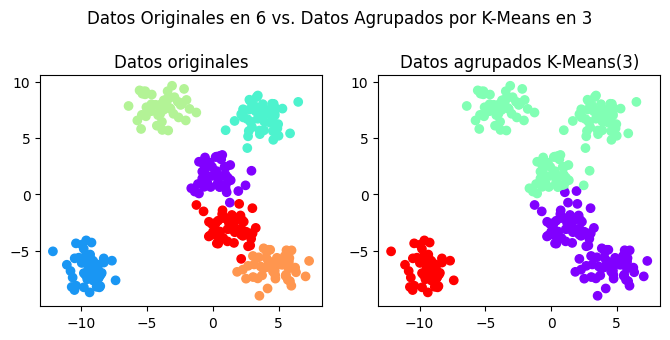

In [97]:
modelo2 = KMeans(n_clusters=3, random_state=42)
modelo2.fit(datos_10[0])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.scatter(datos_10[0][:,0], datos_10[0][:,1], c=datos_10[1], cmap='rainbow')
ax1.set_title("Datos originales")
ax2.scatter(datos_10[0][:,0], datos_10[0][:,1], c=modelo2.labels_, cmap='rainbow')
ax2.set_title("Datos agrupados K-Means(3)")
fig.suptitle('Datos Originales en 6 vs. Datos Agrupados por K-Means en 3', y=1.1)
plt.show()

## EL método del codo

El método del codo (Elbow Method) es una técnica heurística utilizada para ayudar a determinar el número óptimo de clústeres para un algoritmo de agrupamiento como K-Means. Se basa en el cálculo de la suma de los cuadrados de las distancias de cada punto a su centro de clúster asignado (dentro de cada clúster), conocida como "Within-Cluster Sum of Squares" (WCSS) o "inertia".

Aquí te explico cómo funciona:

+ 1.- **Calcular WCSS para diferentes números de clústeres**: Ejecutas el algoritmo K-Means para un rango de posibles números de clústeres (por ejemplo, de 1 a 10). Para cada número de clústeres, calculas el WCSS.
+ 2.- **Graficar el WCSS**: Graficas los valores de WCSS en el eje Y contra el número de clústeres en el eje X.
+ 3.- **Identificar el "codo"**: Observas el gráfico resultante. A medida que aumentas el número de clústeres, el WCSS generalmente disminuye. Esto es porque los puntos están más cerca de los centros de clústeres si hay más clústeres. Sin embargo, la tasa de disminución del WCSS tiende a ralentizarse significativamente después de cierto número de clústeres. El punto en el gráfico donde esta disminución se vuelve menos pronunciada se asemeja a un "codo".
+ 4.- **El número de clústeres óptimo**: El número de clústeres correspondiente al punto del "codo" se considera a menudo el número óptimo de clústeres. En este punto, agregar más clústeres no reduce significativamente el WCSS, lo que sugiere que ya has capturado la mayor parte de la estructura de agrupamiento en los datos.

#### Por qué funciona:

La idea detrás del método del codo es que, a medida que agregas clústeres, el WCSS disminuirá. Sin embargo, hay un punto en el que agregar un clúster adicional no proporciona una mejora sustancial en la reducción del WCSS. Este punto de inflexión sugiere que los clústeres ya están lo suficientemente divididos y agregar más no aportará mucha más información sobre la estructura intrínseca de los datos.

#### Consideraciones:

El método del codo es heurístico y a veces el "codo" no es claramente visible.
Puede ser subjetivo interpretar dónde está exactamente el "codo".
No siempre garantiza encontrar la mejor solución de agrupamiento. Otros métodos, como el coeficiente de silueta, también pueden ser útiles.

#### Cálculo de WCSS para un númeor de cluster entre 1 y 10

In [98]:
wcss = []  # Lista para almacenar los valores de WCSS
rango_clusters = range(1, 11)  # Rango de número de clústeres a probar (de 1 a 10)


for n_clusters in rango_clusters:
    # Instanciar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) # random_state para reproducibilidad

    # Ajustar el modelo a tus datos
    kmeans.fit(datos_10[0]) # Reemplaza 'datos_10[0]' con tus datos

    # Obtener el WCSS (inertia) del modelo ajustado
    wcss.append(kmeans.inertia_)

#### graficado de las inercias calculadas

Número de clústeres: 1, Inercia: 17699.74136917572
Número de clústeres: 2, Inercia: 8900.935979804492
Número de clústeres: 3, Inercia: 3664.3957011148627
Número de clústeres: 4, Inercia: 2162.8575621380405
Número de clústeres: 5, Inercia: 1122.694220727907
Número de clústeres: 6, Inercia: 653.6343944967817
Número de clústeres: 7, Inercia: 618.2832213779732
Número de clústeres: 8, Inercia: 574.6520981204914
Número de clústeres: 9, Inercia: 529.3609301874266
Número de clústeres: 10, Inercia: 490.16694652736277


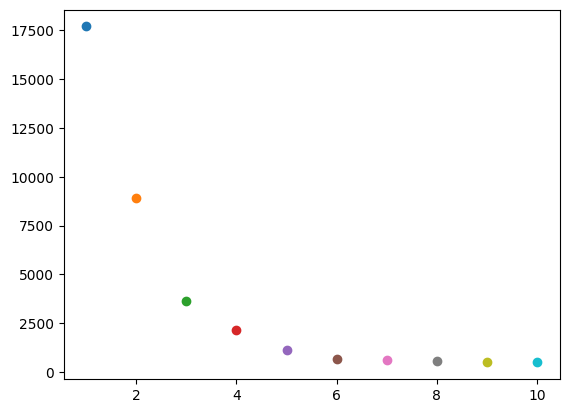

In [99]:
for n_clusters, inertia in enumerate(wcss, start=1):
    print(f"Número de clústeres: {n_clusters}, Inercia: {inertia}")
    plt.plot(n_clusters, inertia, 'o')

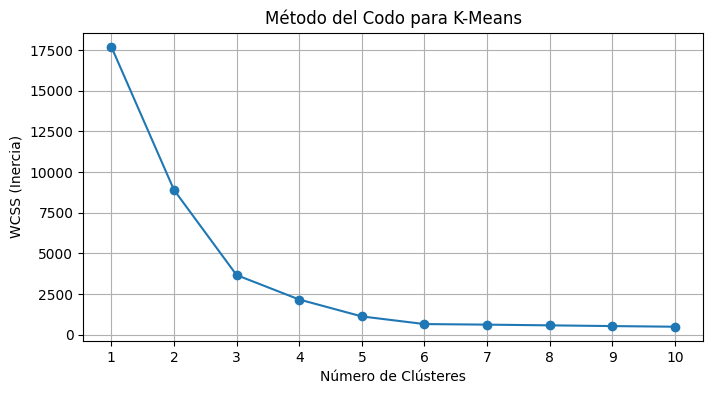

In [100]:
plt.figure(figsize=(8, 4)) # Opcional: ajustar el tamaño de la figura
plt.plot(rango_clusters, wcss, marker='o', linestyle='-') # Graficar el WCSS vs. número de clústeres

plt.title('Método del Codo para K-Means') # Título del gráfico
plt.xlabel('Número de Clústeres') # Etiqueta del eje X
plt.ylabel('WCSS (Inercia)') # Etiqueta del eje Y
plt.xticks(rango_clusters) # Asegurar que se muestren todos los números de clústeres en el eje X
plt.grid(True) # Mostrar una cuadrícula para facilitar la lectura

plt.show()

##### Para una mejor visualización de la parte asint´tica de la curva WCSS

Cambio la escala del eje Y a logar´timica

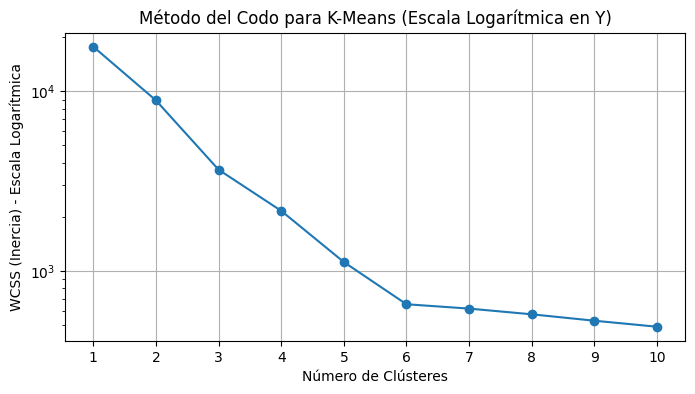

In [101]:
# Suponiendo que ya has calculado la lista 'wcss' y el 'rango_clusters'

plt.figure(figsize=(8, 4)) # Opcional: ajustar el tamaño de la figura
plt.plot(rango_clusters, wcss, marker='o', linestyle='-') # Graficar el WCSS vs. número de clústeres

plt.title('Método del Codo para K-Means (Escala Logarítmica en Y)') # Título del gráfico
plt.xlabel('Número de Clústeres') # Etiqueta del eje X
plt.ylabel('WCSS (Inercia) - Escala Logarítmica') # Etiqueta del eje Y
plt.xticks(rango_clusters) # Asegurar que se muestren todos los números de clústeres en el eje X
plt.grid(True) # Mostrar una cuadrícula para facilitar la lectura

plt.yscale('log') # Cambiar la escala del eje Y a logarítmica

plt.show()

## Silhouette Score

El Silhouette Score es una métrica utilizada para evaluar la calidad de los clusters generados por un algoritmo de clustering, como K-Means. Mide qué tan bien están separados los clusters y qué tan cohesivas son las muestras dentro de ellos.

Aquí te dejo una explicación más detallada:

  + 1.- Individual Score: Para cada punto de datos, se calcula un Silhouette Score individual. Este score tiene en cuenta dos distancias:

    + La distancia promedio a todos los otros puntos dentro del mismo cluster.
    + La distancia promedio al punto más cercano en el siguiente cluster más cercano.

El Silhouette Score individual ($s(i)$) para un punto de datos $i$ se calcula de la siguiente manera:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Donde:

*   $a(i)$: Es la distancia promedio del punto de datos $i$ a todos los otros puntos de datos en el *mismo* cluster.
*   $b(i)$: Es la distancia promedio del punto de datos $i$ a todos los puntos de datos en el *cluster vecino* más cercano (el cluster al que $i$ no pertenece pero que está más cerca en promedio).

El rango del Silhouette Score individual está entre -1 y +1.

  + 2.- Overall Score: El Silhouette Score general para un conjunto de datos se calcula tomando el promedio de los Silhouette Scores individuales de todos los puntos de datos.

  + 3 Interpretación:

    + Un Silhouette Score cercano a +1 indica que los puntos están bien separados y que están fuertemente agrupados dentro de sus clusters.
    + Un Silhouette Score cercano a 0 indica que los puntos están cerca del límite entre dos clusters, lo que sugiere que los clusters no están bien separados.
    + Un Silhouette Score cercano a -1 indica que los puntos pueden haber sido asignados al cluster incorrecto.

En resumen,** un Silhouette Score más alto generalmente indica un mejor clustering**, con clusters que están bien separados y son cohesivos.

In [102]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
print("Silhouette Score:", silhouette_score(datos_10[0], modelo.labels_))

Silhouette Score: 0.6091834283851173


Número de clústeres: 1, Silhouette Score: 0.472478897281846
Número de clústeres: 2, Silhouette Score: 0.5999840284272778
Número de clústeres: 3, Silhouette Score: 0.6091834283851173
Número de clústeres: 4, Silhouette Score: 0.6377619369550195
Número de clústeres: 5, Silhouette Score: 0.6634392367897797
Número de clústeres: 6, Silhouette Score: 0.6060973559926585
Número de clústeres: 7, Silhouette Score: 0.5441704656906342
Número de clústeres: 8, Silhouette Score: 0.4667760126277642
Número de clústeres: 9, Silhouette Score: 0.43721930761036465


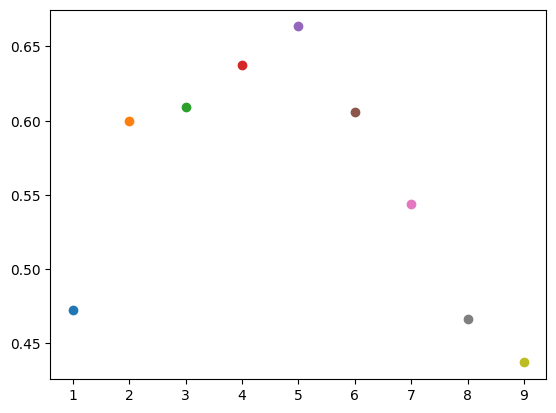

In [103]:
rango_clusters = range(2, 11)  # Rango de número de clústeres a probar (de 2 a 10)
silhouettes = []

for n_clusters in rango_clusters:
    # Instanciar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) # random_state para reproducibilidad

    # Ajustar el modelo a tus datos
    kmeans.fit(datos_10[0]) # Reemplaza 'datos_10[0]' con tus datos

    # Obtener el silhouette_score del modelo ajustado
    silhouettes.append(silhouette_score(datos_10[0], kmeans.labels_))

for n_clusters, silhouette in enumerate(silhouettes, start=1):
    print(f"Número de clústeres: {n_clusters}, Silhouette Score: {silhouette}")
    plt.plot(n_clusters, silhouette, 'o')